""" Inspect the images generated and to be used in training the VAE (and everything else). This includes ensuring they look as they should and that the different rollouts did use different random number generators!!"""

In [19]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#import sys
#import numpy
#numpy.set_printoptions(threshold=sys.maxsize)

In [4]:
import pickle
pickle.dump(observations[0], open('image_array.pkl', 'wb'))
observations[0];

NameError: name 'observations' is not defined

In [5]:
pwd

'/Users/trentonbricken/fem/notebooks'

In [6]:
from PIL import Image
import pickle
ha_obs = pickle.load(open('../../fem/datasets/downloads_from_server/ha_env_obs.pkl', 'rb'))

In [10]:
ha_obs[0].shape

(96, 96, 3)

In [11]:
ha_obs[0][:84].shape

(84, 96, 3)

In [63]:
torch.Tensor([0])

tensor([0.])

(84, 96, 3)


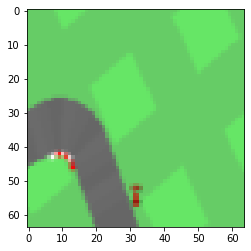

(84, 96, 3)


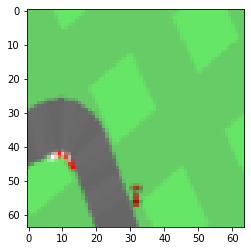

(84, 96, 3)


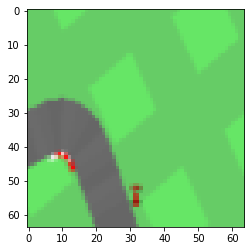

(84, 96, 3)


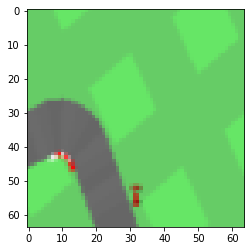

(84, 96, 3)


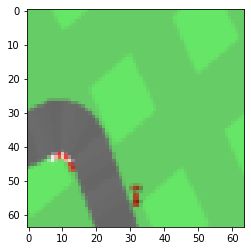

(84, 96, 3)


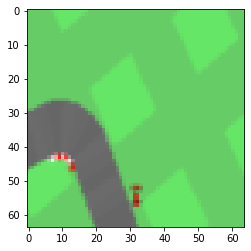

(84, 96, 3)


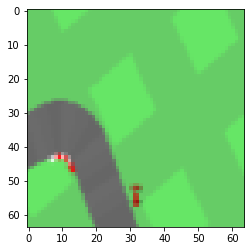

(84, 96, 3)


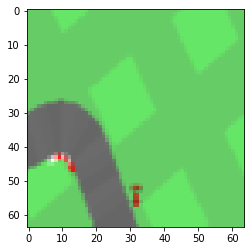

(84, 96, 3)


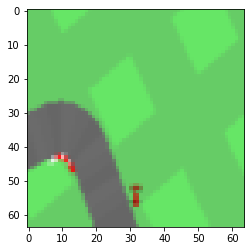

In [40]:
for o in ha_obs:
    o = o[:84]
    print(o.shape)
    o = Image.fromarray(o, mode='RGB')
   
    o = o.resize((64,64), Image.BILINEAR)
    o = np.array(o)/255
    plt.figure()
    plt.imshow(o)
    plt.show()

In [37]:
files = ['../datasets/downloads_from_server/trimmed_rollout0.npz']

========== ../datasets/downloads_from_server/trimmed_rollout0.npz ==========
(1000, 84, 96, 3)
255


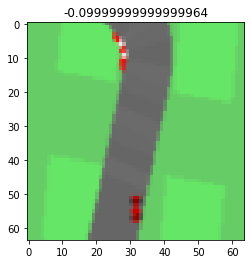

256


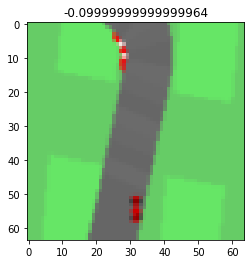

257


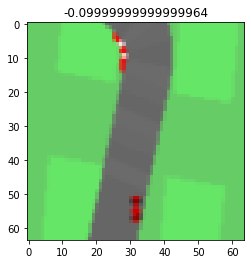

258


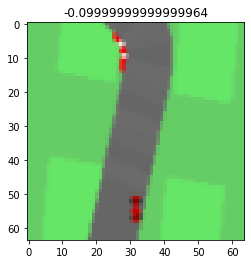

259


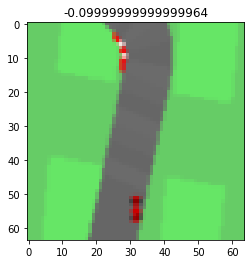

In [38]:
from PIL import Image
from scipy.misc import imresize as resize
for f in files: 
    print('='*10,f,'='*10)
    print('='*20)
    data = np.load(f)
    
    observations = data['observations']
    rewards = data['rewards']
    print(observations.shape)
    
    start=255
    number=5
    for i in range(start, start+number):
        print(i)
        
        frame = Image.fromarray(observations[i], mode='RGB')
        obs = frame.resize((64,64), Image.BILINEAR)
        obs = np.array(obs)/255
        
        plt.figure()
        plt.title(rewards[i])
        plt.imshow(obs)
        plt.show()
    

(array([983.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.1       , -0.03127148,  0.03745704,  0.10618557,  0.17491409,
         0.24364261,  0.31237113,  0.38109966,  0.44982818,  0.5185567 ,
         0.58728522,  0.65601375,  0.72474227,  0.79347079,  0.86219931,
         0.93092784,  0.99965636,  1.06838488,  1.1371134 ,  1.20584192,
         1.27457045,  1.34

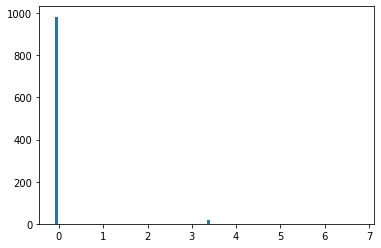

In [39]:
plt.hist(data['rewards'],bins=100)

## How does torch behave when resizing them? 

========== ../datasets/downloads_from_server/trimmed_rollout0.npz ==========
(1000, 84, 96, 3)
255


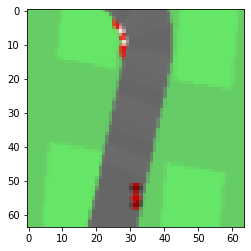

256


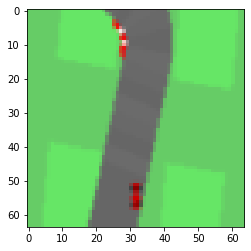

257


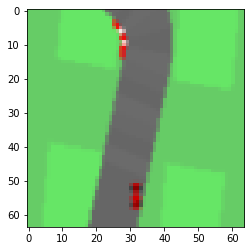

258


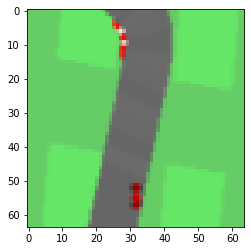

259


Exception ignored in: <function NpzFile.__del__ at 0x10be8e950>
Traceback (most recent call last):
  File "/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py", line 230, in __del__
    self.close()
  File "/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py", line 221, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'


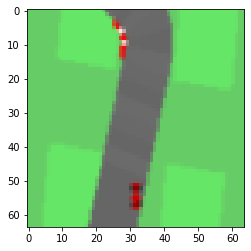

In [44]:

import torch
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

for f in files: 
    print('='*10,f,'='*10)
    print('='*20)
    data = np.load(f)
    
    observations = data['observations']
    print(observations.shape)
    
    start=255
    number=5
    for i in range(start, start+number):
        print(i)
        
        obs = transform(observations[i])
        
        plt.figure()
        plt.imshow(obs.permute(1,2,0))
        plt.show()


In [45]:
obs.permute(1,2,0).shape

torch.Size([64, 64, 3])

In [46]:
obs.shape

torch.Size([3, 64, 64])

In [47]:
observations[i:i+3].shape

(3, 84, 96, 3)

In [48]:
"testing the mdrnn upscaling abilities. "

transform = transforms.Lambda(
    lambda x: np.transpose(x, (0, 3, 1, 2)) / 255)

In [50]:
import torch.nn.functional as f
tobs = torch.Tensor(transform(observations[i:i+5])).unsqueeze(0)

obs = [
            # reshaping the image why wasnt this part of the normal transform? cant use transform as it is applying it to a batch of seq len!!
            f.upsample(x.view(-1, 3, 84, 96), size=64,
                       mode='bilinear', align_corners=True)
            for x in tobs]


/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2390: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [51]:
tobs.shape

torch.Size([1, 5, 3, 84, 96])

In [60]:
lol = torch.randn(5,5)
print((lol))
lol1 = lol[:,1:]
lol = lol[:, :-1]
lol1.shape

tensor([[-0.1510,  0.5600, -1.4819,  0.9237,  0.5566],
        [ 0.7365,  0.1476,  0.1754,  0.4422, -0.4531],
        [-1.0222,  0.8704,  0.1000, -0.2617, -0.1051],
        [ 0.4947, -0.4779, -0.2894,  1.5333, -0.7020],
        [ 1.0677,  0.7291,  1.3932, -0.0060,  0.1733]])


torch.Size([5, 4])

In [61]:
print(lol)
print(lol1)

tensor([[-0.1510,  0.5600, -1.4819,  0.9237],
        [ 0.7365,  0.1476,  0.1754,  0.4422],
        [-1.0222,  0.8704,  0.1000, -0.2617],
        [ 0.4947, -0.4779, -0.2894,  1.5333],
        [ 1.0677,  0.7291,  1.3932, -0.0060]])
tensor([[ 0.5600, -1.4819,  0.9237,  0.5566],
        [ 0.1476,  0.1754,  0.4422, -0.4531],
        [ 0.8704,  0.1000, -0.2617, -0.1051],
        [-0.4779, -0.2894,  1.5333, -0.7020],
        [ 0.7291,  1.3932, -0.0060,  0.1733]])


In [ ]:
f.upsample(x.view(-1, 3, 84, 96)

In [65]:
tobs.shape

torch.Size([1, 5, 3, 96, 96])

In [66]:
len(obs)

1

In [64]:
obs[0].shape

torch.Size([5, 3, 64, 64])

In [67]:
obs = obs[0]

In [68]:
obs.shape

torch.Size([5, 3, 64, 64])

0


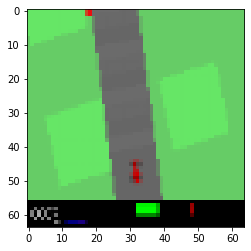

1


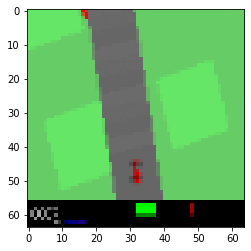

2


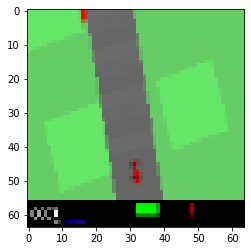

3


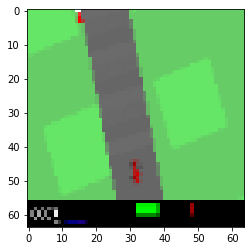

4


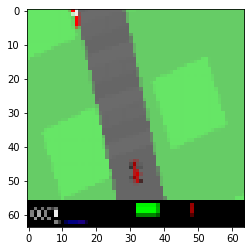

In [69]:
for i in range(5):
        print(i)
        
        plt.figure()
        plt.imshow(obs[i].permute(1,2,0))
        plt.show()

In [ ]:
# nice!